When observing a point source (star, quasar), it can be displaced by motion due to parallax or by differential chromatic refraction (it has a slightly different color than other objects in the field, and thus diffracts through the atmosphere slightly differently).

If one is not careful, the direction of parallax offset and the direction of DCR can align, and thus it is impossible to tell which effect is responsible for shifting the position of the star.  This metric uses stackers to compute the predicted offsets due to parallax and DCR.  Then, it tries to fit the offsets and checks for any correlation between the fitted parallax amplitude and DCR amplitude.  

The metric fits the RA and Dec offsets simultaneously.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import numpy as np

In [2]:
# Set up the database connection
# Database available from: http://astro-lsst-01.astro.washington.edu:8081/db_gzip/baseline2018a.db.gz
opsdb = db.OpsimDatabase('baseline2018a.db')
outDir = 'astrometry_dcr'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
sql = 'night < %i' % (365.25*5) 
slicer = slicers.HealpixSlicer(nside=8)
metricList = []
metricList.append(metrics.ParallaxDcrDegenMetric())
metricList.append(metrics.ParallaxDcrDegenMetric(rmag=24., SedTemplate='B', metricName='DCR-Degen-faint-B'))

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes


In [4]:
bundleList = []
for metric in metricList:
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

In [5]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with constraint night < 1826 for columns ['seeingFwhmGeom', 'fieldRA', 'observationStartMJD', 'fieldDec', 'filter', 'altitude', 'observationStartLST', 'fiveSigmaDepth']
Found 1184315 visits
Running:  ['opsim_ParallaxDcrDegenMetric_night_lt_1826_HEAL', 'opsim_DCR-Degen-faint-B_night_lt_1826_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "night < 1826" constraint now.
monopole: 0.0884831  dipole: lon: -126.572, lat: -72.2575, amp: 0.499817
monopole: 0.0324339  dipole: lon: -136.12, lat: -78.0332, amp: 0.552653
Plotting complete.


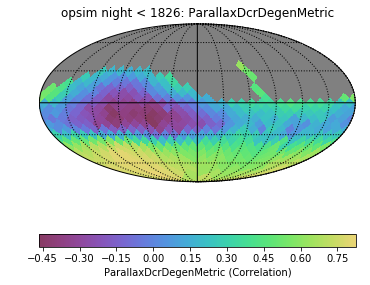

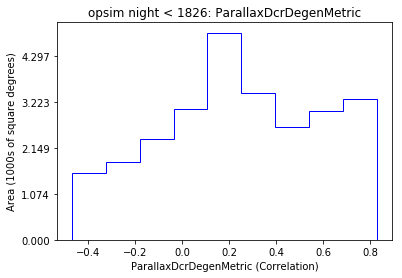

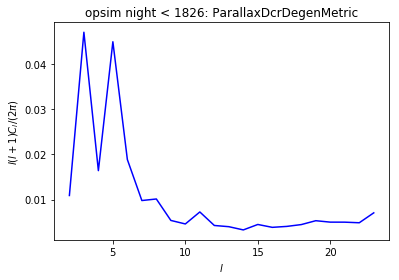

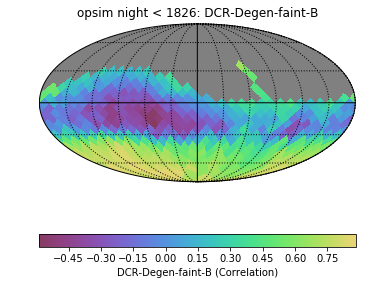

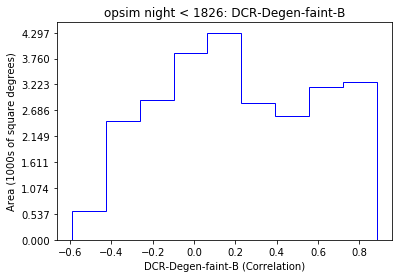

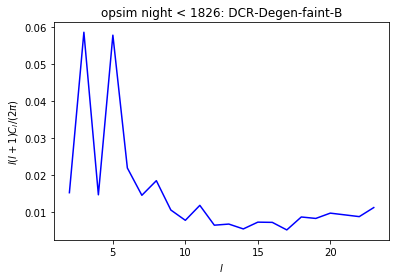

In [6]:
bgroup.plotAll(closefigs=False)

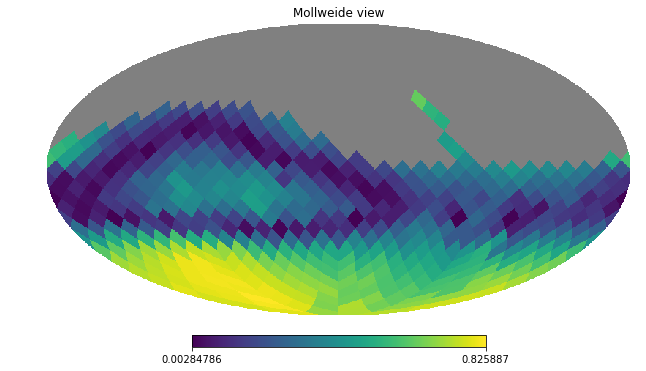

In [7]:
import healpy as hp
hp.mollview(np.abs(bundleList[0].metricValues))